In [4]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt



In [62]:
def split_output(output):
    cnt, prey, predator, berry = [], [], [], []

    for line in output.strip().split('\n'):
        a, b, c, d = map(int, line.split())
        cnt.append(a)
        prey.append(b)
        predator.append(c)
        berry.append(d)

    cnt = np.array(cnt)
    prey = np.array(prey)
    predator = np.array(predator)
    berry = np.array(berry)

    return cnt, prey, predator, berry

In [114]:
#Make sure Callable.java is compiled
def simulate(reproduction_type = "FOOD", 
             step_count = 1000,
             starting_prey = 10,
             starting_predator = 10,
             starting_berry = 0,
             max_berry = 500,
             berry_value = 50,
             prey_value = 50,
             starting_food_level = 50,
             starvation_coeff = 2,
             eating_radius = 10,
             reproduction_food_level = 100,
             speed = 100,
             prey_spawn_rate = 0.05,
             predator_spawn_rate = 0.05,
             berry_spawn_rate = 10,
             simulation_timestep = 0.5
            ):
    path_to_out = '..\..' #Change it according to your IDE settings
    command = f'java -cp {path_to_out}\out\production\high_fidelity PyInterface.Callable '\
    f'{reproduction_type} '\
    f'{step_count} '\
    f'{starting_prey} '\
    f'{starting_predator} '\
    f'{starting_berry} '\
    f'{max_berry} '\
    f'{berry_value} '\
    f'{prey_value} '\
    f'{starting_food_level} '\
    f'{starvation_coeff} '\
    f'{eating_radius} '\
    f'{reproduction_food_level} '\
    f'{speed} '\
    f'{prey_spawn_rate} '\
    f'{predator_spawn_rate} '\
    f'{berry_spawn_rate} '\
    f'{simulation_timestep}'

    process = subprocess.Popen(command, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    print(stderr)
    return split_output(stdout.decode())

In [73]:
def plot_populations(prey, predator):
    cnt = np.arange(0,prey.size)
    plt.figure(figsize=(8, 5))
    plt.plot(cnt, prey, label='Prey count')
    plt.plot(cnt, predator, label='Predator count')
    # plt.plot(cnt, berry, label='Berry Count')
    
    plt.title('Simulation')
    plt.xlabel('Time')
    plt.ylabel('Number of species')
    
    plt.legend()
    
    plt.show()

In [130]:
cnt, prey, predator, berry = simulate(step_count = 1000)

b''


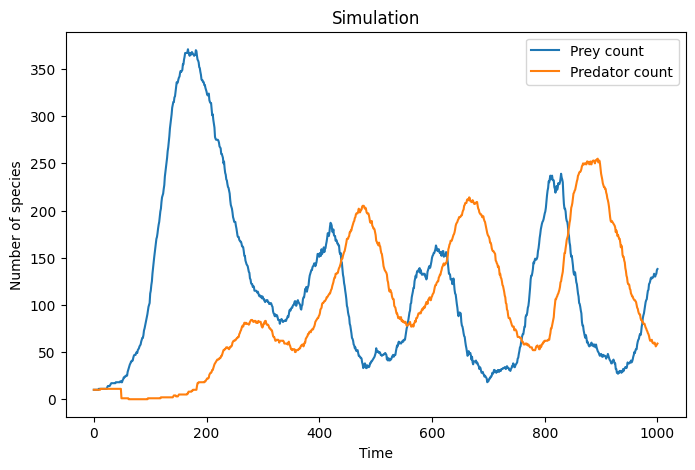

In [131]:
plot_populations(prey, predator)